In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

rhos = h5py.File('/home/jiachuan/2pt_measurements_Y3/Jefferson2025RhoTau/rowe_stats_DESY3.hdf5', 'r')
taus = h5py.File('/home/jiachuan/2pt_measurements_Y3/Jefferson2025RhoTau/tau_stats_DESY3.hdf5', 'r')

def get_delta_xi_pm_PSF(alphas, betas, etas, rho_stats, Rbins):
    thetas = rho_stats[0]['r_nom'].copy()
    Ntheta = len(thetas)
    Nsrc = len(alphas)
    N_xipm = Nsrc*(Nsrc+1)*Ntheta
    dxipm = np.zeros(N_xipm)
    dxipm_err = np.zeros(N_xipm)
    ct = 0
    for i in range(Nsrc):
        for j in range(i,Nsrc):
            
            ai, bi, ci = alphas[i], betas[i], etas[i]
            aj, bj, cj = alphas[j], betas[j], etas[j]
            delta_xip = ai*aj*rho_stats[0]['xip'] + bi*bj*rho_stats[1]['xip'] + (ai*bj+aj*bi)*rho_stats[2]['xip']+\
                        ci*cj*rho_stats[3]['xip'] + (bi*cj+bj*ci)*rho_stats[4]['xip']+\
                        (ai*cj+aj*ci)*rho_stats[5]['xip']
            delta_xim = ai*aj*rho_stats[0]['xim'] + bi*bj*rho_stats[1]['xim'] + (ai*bj+aj*bi)*rho_stats[2]['xim']+\
                        ci*cj*rho_stats[3]['xim'] + (bi*cj+bj*ci)*rho_stats[4]['xim']+\
                        (ai*cj+aj*ci)*rho_stats[5]['xim']
            delta_xip_var = (ai*aj*rho_stats[0]['sigma_xip'])**2 + (bi*bj*rho_stats[1]['sigma_xip'])**2 + \
                        ((ai*bj+aj*bi)*rho_stats[2]['sigma_xip'])**2+\
                        (ci*cj*rho_stats[3]['sigma_xip'])**2 + ((bi*cj+bj*ci)*rho_stats[4]['sigma_xip'])**2+\
                        ((ai*cj+aj*ci)*rho_stats[5]['sigma_xip'])**2
            delta_xim_var = (ai*aj*rho_stats[0]['sigma_xim'])**2 + (bi*bj*rho_stats[1]['sigma_xim'])**2 + \
                        ((ai*bj+aj*bi)*rho_stats[2]['sigma_xim'])**2+\
                        (ci*cj*rho_stats[3]['sigma_xim'])**2 + ((bi*cj+bj*ci)*rho_stats[4]['sigma_xim'])**2+\
                        ((ai*cj+aj*ci)*rho_stats[5]['sigma_xim'])**2
            
            dxipm[ct:ct+Ntheta] = delta_xip / (Rbins[i]*Rbins[j])
            dxipm[ct+N_xipm//2:ct+Ntheta+N_xipm//2] = delta_xim / (Rbins[i]*Rbins[j])
            dxipm_err[ct:ct+Ntheta] = delta_xip_var**0.5 / (Rbins[i]*Rbins[j])
            dxipm_err[ct+N_xipm//2:ct+Ntheta+N_xipm//2] = delta_xim_var**0.5 / (Rbins[i]*Rbins[j])
            
            ct += Ntheta
    return dxipm, dxipm_err

def get_delta_xi_pm_PSF_Jefferson(alphas, betas, etas, Rbins):
    thetas = rhos['rowe_statistics'][f'rowe_0_PSF-reserved']['theta'][:].copy()
    Ntheta = len(thetas)
    Nsrc = len(alphas)
    N_xipm = Nsrc*(Nsrc+1)*Ntheta
    dxipm = np.zeros(N_xipm)
    dxipm_err = np.zeros(N_xipm)
    ct = 0
    for i in range(Nsrc):
        for j in range(i,Nsrc):
            
            ai, bi, ci = alphas[i], betas[i], etas[i]
            aj, bj, cj = alphas[j], betas[j], etas[j]
            
            rho_stats = [rhos['rowe_statistics'][f'rowe_{k}_PSF-reserved'] for k in range(6)]
            # xi_plus xi_minus
            delta_xip = ai*aj*rho_stats[0]['xi_plus'][:] + bi*bj*rho_stats[1]['xi_plus'][:] + (ai*bj+aj*bi)*rho_stats[2]['xi_plus'][:]+\
                        ci*cj*rho_stats[3]['xi_plus'][:] + (bi*cj+bj*ci)*rho_stats[4]['xi_plus'][:]+\
                        (ai*cj+aj*ci)*rho_stats[5]['xi_plus'][:]
            delta_xim = ai*aj*rho_stats[0]['xi_minus'][:] + bi*bj*rho_stats[1]['xi_minus'][:] + (ai*bj+aj*bi)*rho_stats[2]['xi_minus'][:]+\
                        ci*cj*rho_stats[3]['xi_minus'][:] + (bi*cj+bj*ci)*rho_stats[4]['xi_minus'][:]+\
                        (ai*cj+aj*ci)*rho_stats[5]['xi_minus'][:]
            delta_xip_var = (ai*aj*rho_stats[0]['xip_err'][:])**2 + (bi*bj*rho_stats[1]['xip_err'][:])**2 + \
                        ((ai*bj+aj*bi)*rho_stats[2]['xip_err'][:])**2+\
                        (ci*cj*rho_stats[3]['xip_err'][:])**2 + ((bi*cj+bj*ci)*rho_stats[4]['xip_err'][:])**2+\
                        ((ai*cj+aj*ci)*rho_stats[5]['xip_err'][:])**2
            delta_xim_var = (ai*aj*rho_stats[0]['xim_err'][:])**2 + (bi*bj*rho_stats[1]['xim_err'][:])**2 + \
                        ((ai*bj+aj*bi)*rho_stats[2]['xim_err'][:])**2+\
                        (ci*cj*rho_stats[3]['xim_err'][:])**2 + ((bi*cj+bj*ci)*rho_stats[4]['xim_err'][:])**2+\
                        ((ai*cj+aj*ci)*rho_stats[5]['xim_err'][:])**2
            
            dxipm[ct:ct+Ntheta] = delta_xip / (Rbins[i]*Rbins[j])
            dxipm[ct+N_xipm//2:ct+Ntheta+N_xipm//2] = delta_xim / (Rbins[i]*Rbins[j])
            dxipm_err[ct:ct+Ntheta] = delta_xip_var**0.5 / (Rbins[i]*Rbins[j])
            dxipm_err[ct+N_xipm//2:ct+Ntheta+N_xipm//2] = delta_xim_var**0.5 / (Rbins[i]*Rbins[j])
            
            ct += Ntheta
    return thetas, dxipm, dxipm_err 

In [3]:
rho_stats = []
rho_riz_stats = []
components = ['p', 'q', 'w']
for i in range(3):
    for j in range(i+1):
        print(components[i], components[i-j])
        rho_riz = np.genfromtxt("./data_planck/rho_stats_%s%s_riz_Ntheta30.txt"%(components[i], components[i-j]), 
                            names=True, skip_header=1)
        rho_riz_stats.append(rho_riz)
        rho = np.genfromtxt("./data_planck/%s%s_Ntheta30.txt"%(components[i], components[i-j]), 
                            names=True, skip_header=1)
        rho_stats.append(rho)
### metacal shear response
Rbin = [0.7673669717321605,
 0.7279372688421033,
 0.7049329823902084,
 0.6235315664504599]
#Rbin = [1,1,1,1]

p p
q q
q p
w w
w q
w p


In [4]:
tau_riz_stats = []
components = ['p', 'q', 'w']
for i in range(4):
    _tau_riz_stats = []
    for j in range(3):
        print(components[j], f'S{i+1}')
        tau_riz = np.genfromtxt("./data_planck/tau_stats_%s-S%d_riz_Ntheta30.txt"%(components[j], i), 
                            names=True, skip_header=1)
        _tau_riz_stats.append(tau_riz)
    tau_riz_stats.append(_tau_riz_stats)

p S1
q S1
w S1
p S2
q S2
w S2
p S3
q S3
w S3
p S4
q S4
w S4


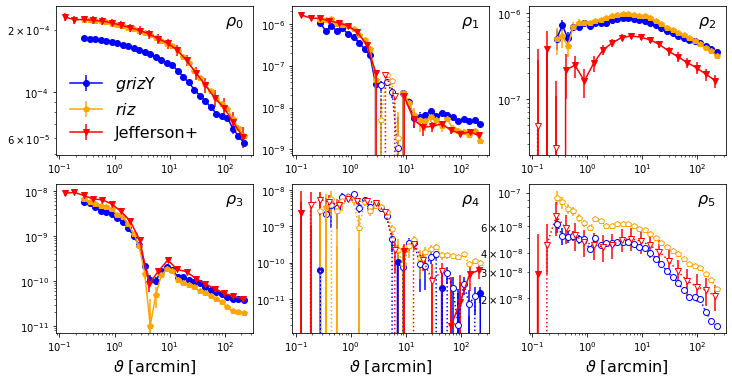

In [80]:
fig, axes = plt.subplots(2,3,figsize=(12,6))

for i in range(6):
    ax = axes[i//3, i%3]
    
    rho = rho_stats[i]
    ax.errorbar(rho['r_nom'], rho['xip'], yerr=rho['sigma_xip'], ls='-', color='blue',
                marker='o', label='$griz$Y')
    ax.errorbar(rho['r_nom'], -rho['xip'], yerr=rho['sigma_xip'], ls=':', color='blue', 
                marker='o', mfc='white')
    
    rho_riz = rho_riz_stats[i]
    ax.errorbar(rho_riz['r_nom'], rho_riz['xip'], yerr=rho_riz['sigma_xip'], ls='-', 
                color='orange', marker='p', label='$riz$')
    ax.errorbar(rho_riz['r_nom'], -rho_riz['xip'], yerr=rho_riz['sigma_xip'], ls=':', color='orange', 
                marker='p', mfc='white')
    
    rho_jefferson = rhos['rowe_statistics'][f'rowe_{i}_PSF-reserved']
    ax.errorbar(rho_jefferson['theta'][:], rho_jefferson['xi_plus'][:], yerr=rho_jefferson['xip_err'][:], ls='-',
               color='red', marker='v', label='Jefferson+')
    ax.errorbar(rho_jefferson['theta'][:], -rho_jefferson['xi_plus'][:], yerr=rho_jefferson['xip_err'][:], ls=':',
               color='red', marker='v', mfc='white')
    
    ax.text(0.95, 0.95, r'$\rho_'f'{i}'r'$', transform=ax.transAxes, fontsize=16, ha='right', va='top')
    ax.set(xscale='log', yscale='log')
    if i//3==1:
        ax.set_xlabel(r'$\vartheta$ [arcmin]', fontsize=16)
axes[0,0].legend(loc='lower left', fontsize=16, frameon=False)
plt.show()
#plt.savefig('figs/rho_stats_compare.png', 
#            dpi=300, transparent=False, facecolor="white")

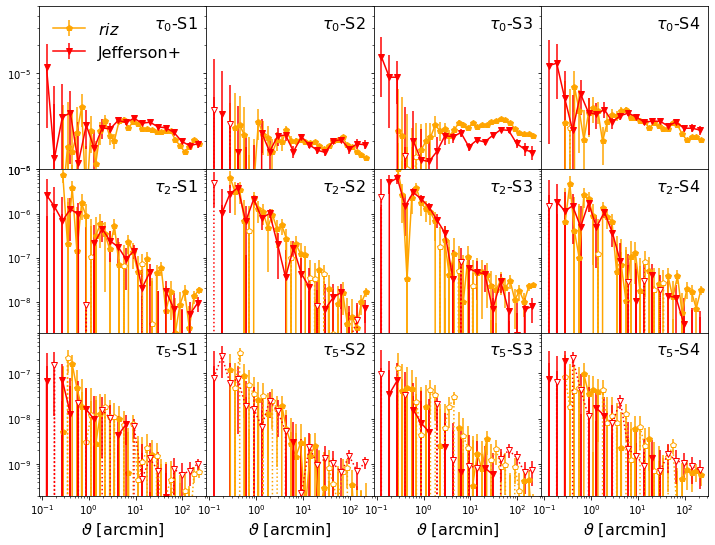

In [6]:
fig, axes = plt.subplots(3,4,figsize=(12,9), sharey=False)

for i in range(4):
    for j in range(3):
        ax = axes[j, i]
        
        ### Tau from riz
        tau_riz = tau_riz_stats[i][j]
        ax.errorbar(tau_riz['r_nom'], tau_riz['xip']/Rbin[i], yerr=tau_riz['sigma_xip']/Rbin[i], ls='-', 
                    color='orange', marker='p', label='$riz$')
        ax.errorbar(tau_riz['r_nom'], -tau_riz['xip']/Rbin[i], yerr=tau_riz['sigma_xip']/Rbin[i], ls=':', 
                    color='orange', marker='p', mfc='white')
        ### Tau from Jefferson
        tau_jefferson = taus['tau_statistics']['tau_PSF-reserved'][f'bin_{i}']
        tag = ['tau0p', 'tau2p', 'tau5p'][j]
        tau_err_jefferson = np.diag(taus['tau_statistics']['tau_PSF-reserved'][f'bin_{i}']['cov'][:])**0.5
        ax.errorbar(tau_jefferson['theta'][:], tau_jefferson[tag][:], 
                    yerr=tau_err_jefferson[j*40+20:(j+1)*40], ls='-',
                   color='red', marker='v', label='Jefferson+')
        ax.errorbar(tau_jefferson['theta'][:], -tau_jefferson[tag][:], 
                    yerr=tau_err_jefferson[j*40+20:(j+1)*40], ls=':',
                   color='red', marker='v', mfc='white')

        ax.text(0.95, 0.95, r'$\tau_'f'{[0,2,5][j]}'r'$-S%d'%(i+1), 
                transform=ax.transAxes, fontsize=16, ha='right', va='top')
        ax.set(xscale='log', yscale='log')
        if j==2:
            ax.set_xlabel(r'$\vartheta$ [arcmin]', fontsize=16)
        else:
            ax.set(xticklabels=[])
        if j==0:
            ax.set(ylim=[1e-6, 5e-5])
        elif j==1:
            ax.set(ylim=[2e-9, 1e-5])
        elif j==2:
            ax.set(ylim=[2e-10, 8e-7])
        if i!=0:
            ax.set(yticklabels=[])
axes[0,0].legend(loc='upper left', fontsize=16, frameon=False)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Ndata = 20


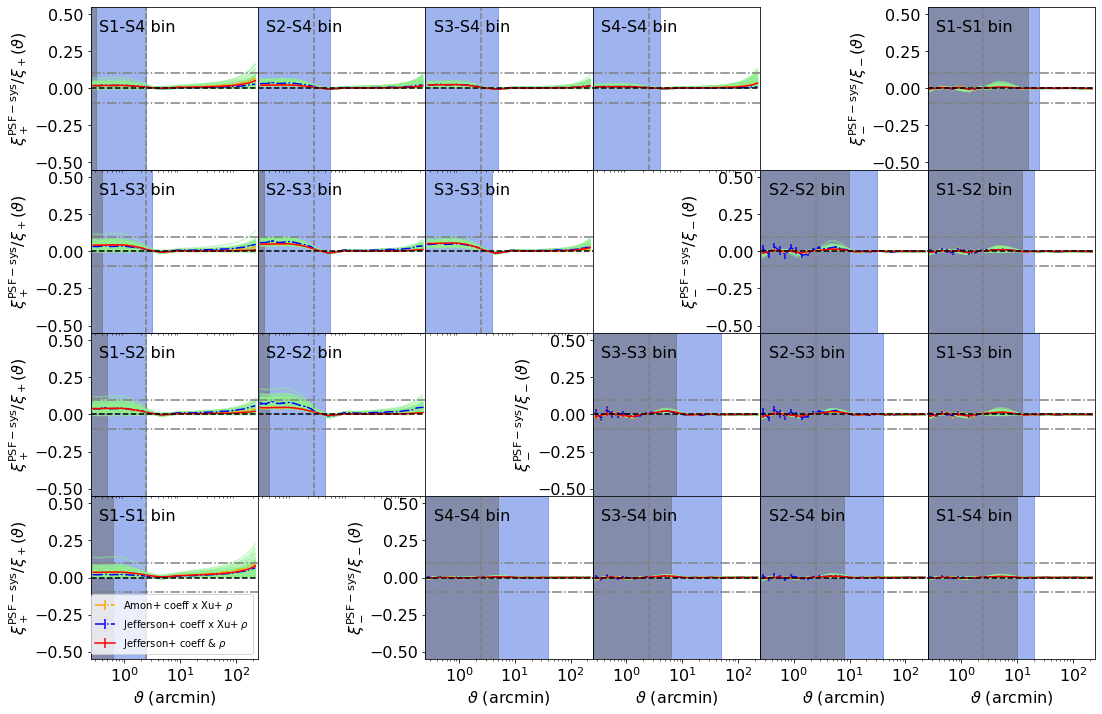

In [106]:
fig = plt.figure(figsize=(18, 12))

use_real_data = False
TARGET_DIR = "/home/jiachuan/2pt_measurements_Y3/data_planck"
thetas_edge = np.logspace(np.log10(0.25), np.log10(250), 31)
thetas = np.sqrt(thetas_edge[1:]*thetas_edge[:-1])

ct = 0
lines = []

### get the delta xi_pm
# coeff: Jefferson+; rhos: mine
alphas_Jefferson = [9.10e-3, 4.31e-3, 3.5e-3, 1.23e-3]
betas_Jefferson = [0.491, 1.84, 2.4, 1.42]
etas_Jefferson = [-2.31, -5.55, 1.54, -2.86]
dxipm_Jefferson, dxipm_err_Jefferson = get_delta_xi_pm_PSF(alphas_Jefferson, betas_Jefferson, etas_Jefferson, 
                                                           rho_riz_stats, Rbin)
# coeff: Amon+l rhos: mine
alphas_Amon = [0.010, -0.001, -0.004, 0.014]
betas_Amon = [0.6, 1.4, 2.5, 1.3]
etas_Amon = [-4.6, -4.5, 3.0, 4.2]
dxipm_Amon, dxipm_err_Amon = get_delta_xi_pm_PSF(alphas_Amon, betas_Amon, etas_Amon, 
                                                           rho_riz_stats, Rbin)
# coeff: Jefferson+; rhos: Jefferson+
thetas_jef, dxipm_jef, dxipm_err_jef = get_delta_xi_pm_PSF_Jefferson(alphas_Amon, betas_Amon, etas_Amon, Rbin)

# MCMC sample
Nsteps = taus['tau_statistics']['chain_bestfits_PSF-reserved']['bin_0']['alpha'][:].shape[0]
rand_samp = np.random.choice(Nsteps, 100, replace=False)
rand_dxipm = []
for idx in rand_samp:
    _alphas = [taus['tau_statistics']['chain_bestfits_PSF-reserved'][f'bin_{k}']['alpha'][idx] 
               for k in range(4)]
    _betas = [taus['tau_statistics']['chain_bestfits_PSF-reserved'][f'bin_{k}']['beta'][idx] 
               for k in range(4)]
    _etas = [taus['tau_statistics']['chain_bestfits_PSF-reserved'][f'bin_{k}']['eta'][idx] 
               for k in range(4)]
    _, _dxipm, _dxipm_err = get_delta_xi_pm_PSF_Jefferson(_alphas, _betas, _etas, Rbin)
    rand_dxipm.append(_dxipm)

### get a reference data vector and mask
baseline_mask = np.genfromtxt(os.path.join(TARGET_DIR,
                    "xi_DESY3xPLKR4_6x2pt_Maglim_baseline_Ntheta30_candidate10_v2.mask"))
Y3_mask = np.genfromtxt(os.path.join(TARGET_DIR,
                    "xi_DESY3xPLKR4_6x2pt_Maglim_baseline_Ntheta30_Y3aggr.mask"))
# baseline_dv = np.genfromtxt(os.path.join(TARGET_DIR,
#                     "xi_DESY3xPLKR4_6x2pt_Maglim_baseline_Ntheta30_PubY3bestfit3x2ptNLA_HF.simudata"))[:600,1]
baseline_dv = np.genfromtxt(os.path.join(TARGET_DIR,
                    "xi_DESY3_cosmic_shear_Ntheta30_JeffersonFiducial_T7.8.simudata"))[:600,1]

### show shear-shear xi+
for i in range(4):
    for j in range(i,4):
        ax = plt.subplot2grid((4, 6), (3-j, i))
        ax.text(0.05,0.85,'S%d-S%d bin'%(i+1, j+1),transform=ax.transAxes, fontsize=16)
        
        ### Read Real Measurements
        if use_real_data:
            xi_s = np.genfromtxt(os.path.join(TARGET_DIR, "shear_small-scale_withIm_%d_%d.txt"%(i,j)), names=True)
            xi_l = np.genfromtxt(os.path.join(TARGET_DIR, "shear_withIm_%d_%d.txt"%(i,j)), names=True)
            r = np.hstack([xi_s['r'], xi_l['r']])
            xi = np.hstack([xi_s['xip'], xi_l['xip']])
            xivar = np.hstack([xi_s["varxip"], xi_l["varxip"]])
        else:
            xi = baseline_dv[ct*30:(ct+1)*30]
            xivar = np.zeros(30)
            r = thetas
        ### Plot PSF contaminations
        # data vector
        y_Amon = dxipm_Amon[ct*30:(ct+1)*30]; yerr_Amon=dxipm_err_Amon[ct*30:(ct+1)*30]
        y_Jefferson = dxipm_Jefferson[ct*30:(ct+1)*30]; yerr_Jefferson=dxipm_err_Jefferson[ct*30:(ct+1)*30]
        y_jef_grid = dxipm_jef[ct*20:(ct+1)*20]; yerr_jef_grid = dxipm_err_jef[ct*20:(ct+1)*20]
        y_jef = np.interp(np.log10(r), np.log10(thetas_jef), y_jef_grid)
        yerr_jef = np.interp(np.log10(r), np.log10(thetas_jef), yerr_jef_grid)
        
        # data vector ratio
        ratio_err_Amon = (y_Amon/xi)*np.sqrt(xivar/xi**2 + (yerr_Amon/y_Amon)**2)
        ratio_err_Jefferson = y_Jefferson/xi*np.sqrt(xivar/xi**2 + (yerr_Jefferson/y_Jefferson)**2)
        ratio_err_jef = y_jef/xi*np.sqrt(xivar/xi**2 + (yerr_jef/y_jef)**2)
        
        _l1 = ax.errorbar(r, y_Amon/xi, yerr=ratio_err_Amon, color='orange', ls='-.',
                          label=r'Amon+ coeff x Xu+ $\rho$', zorder=1)
        _l2 = ax.errorbar(r, y_Jefferson/xi, yerr=ratio_err_Jefferson, color='blue', ls='-.', 
                          label=r'Jefferson+ coeff x Xu+ $\rho$', zorder=1)
        _l3 = ax.errorbar(r, y_jef/xi, yerr=ratio_err_jef, color='red', ls='-',
                          label=r'Jefferson+ coeff & $\rho$', zorder=1)
#         ax.fill_between([0,300], -0.1, 0.1, color='grey', alpha=0.5)
        ax.axhline(-0.1, color='grey', ls='-.')
        ax.axhline(0.1, color='grey', ls='-.')
        
        # MCMC sample
        for _dxipm in rand_dxipm:
            _y_jef = np.interp(np.log10(r), np.log10(thetas_jef), _dxipm[ct*20:(ct+1)*20])
            ax.plot(r, _y_jef/xi, color='lightgreen', ls='-', alpha=0.5, zorder=0)
            
        ### annotate masks
        ax.axvline(2.5, color='grey', ls='--')
        for m,c in zip([Y3_mask, baseline_mask], ['royalblue', 'dimgrey']):
            _m = np.where(m[ct*30:(ct+1)*30]<0.5)[0]
            _x = r[_m]
            if len(_x)>0:
                if len(_x)==1:
                    _x = [_x[0], _x[0]]
                _x[-1] *= 1.12
                _x[0] /= 1.12
                ax.fill_between(_x, -10, 10, color=c, zorder=0, alpha=0.5)
        
        ### Plot customization
        ax.set(xscale='log')
        ax.tick_params(axis='both', which='major', labelsize=16)
        if (i==0):
            ax.set_ylabel(r'$\xi^\mathrm{PSF-sys}_+/\xi_+(\vartheta)$', fontsize=16)
        else:
            ax.set_yticks([])
        if (j==0):
            ax.set_xlabel(r'$\vartheta$ (arcmin)', fontsize=16)
        else:
            ax.set_xticks([])
        ax.set_ylim([-0.55,0.55])
        ax.set_xlim([0.25, 250])
        ax.axhline(0, ls='--', color='k')
        ct += 1
        if (i==j==0):
            ax.legend(loc='lower right')
### show shear-shear xi-
for i in range(4):
    for j in range(i,4):
        ax = plt.subplot2grid((4, 6), (j, 5-i))
        ax.text(0.05,0.85,'S%d-S%d bin'%(i+1, j+1),transform=ax.transAxes, fontsize=16)
        
        ### Read Real Measurements
        if use_real_data:
            xi_s = np.genfromtxt(os.path.join(TARGET_DIR, "shear_small-scale_%d_%d.txt"%(i,j)), names=True)
            xi_l = np.genfromtxt(os.path.join(TARGET_DIR, "shear_%d_%d.txt"%(i,j)), names=True)
            r = np.hstack([xi_s['r'], xi_l['r']])
            xi = np.hstack([xi_s['xim'], xi_l['xim']])
            xivar = np.hstack([xi_s["varxim"], xi_l["varxim"]])
        else:
            xi = baseline_dv[ct*30:(ct+1)*30]
            xivar = np.zeros(30)
            r = thetas
        ### Plot PSF contaminations
        y_Amon = dxipm_Amon[ct*30:(ct+1)*30]; yerr_Amon=dxipm_err_Amon[ct*30:(ct+1)*30]
        y_Jefferson = dxipm_Jefferson[ct*30:(ct+1)*30]; yerr_Jefferson=dxipm_err_Jefferson[ct*30:(ct+1)*30]
        y_jef_grid = dxipm_jef[ct*20:(ct+1)*20]; yerr_jef_grid = dxipm_err_jef[ct*20:(ct+1)*20]
        y_jef = np.interp(np.log10(r), np.log10(thetas_jef), y_jef_grid)
        yerr_jef = np.interp(np.log10(r), np.log10(thetas_jef), yerr_jef_grid)
        
        ratio_err_Amon = (y_Amon/xi)*np.sqrt(xivar/xi**2 + (yerr_Amon/y_Amon)**2)
        ratio_err_Jefferson = y_Jefferson/xi*np.sqrt(xivar/xi**2 + (yerr_Jefferson/y_Jefferson)**2)
        ratio_err_jef = y_jef/xi*np.sqrt(xivar/xi**2 + (yerr_jef/y_jef)**2)
        
        ax.errorbar(r, y_Amon/xi, yerr=ratio_err_Amon, color='orange', ls='-.', zorder=1)
        ax.errorbar(r, y_Jefferson/xi, yerr=ratio_err_Jefferson, color='blue', ls='-.', zorder=1)
        ax.errorbar(r, y_jef/xi, yerr=ratio_err_jef, color='red', ls='-', zorder=1)
        ax.axhline(-0.1, color='grey', ls='-.')
        ax.axhline(0.1, color='grey', ls='-.')
        
        # MCMC sample
        for _dxipm in rand_dxipm:
            _y_jef = np.interp(np.log10(r), np.log10(thetas_jef), _dxipm[ct*20:(ct+1)*20])
            ax.plot(r, _y_jef/xi, color='lightgreen', ls='-', alpha=0.5, zorder=0)
        
        ### annotate masks
        ax.axvline(2.5, color='grey', ls='--')
        for m,c in zip([Y3_mask, baseline_mask], ['royalblue', 'dimgrey']):
            _m = np.where(m[ct*30:(ct+1)*30]<0.5)[0]
            _x = r[_m]
            if len(_x)>0:
                if len(_x)==1:
                    _x = [_x[0], _x[0]]
                _x[-1] *= 1.12
                _x[0] /= 1.12
                ax.fill_between(_x, -10, 10, color=c, zorder=0, alpha=0.5)
        
        ### Plot customization
        ax.set(xscale='log')
        if(i==j):
            ax.set_ylabel(r'$\xi^\mathrm{PSF-sys}_-/\xi_-(\vartheta)$', fontsize=16)
            ax.tick_params(axis='y', which='major', labelsize=16)
        else:
            ax.set_yticks([])
        if(j==3):
            ax.set_xlabel(r'$\vartheta$ (arcmin)', fontsize=16)
            ax.tick_params(axis='x', which='major', labelsize=16)
        else:
            ax.set_xticks([])
        ax.set_ylim([-0.55,0.55])
        ax.set_xlim([0.25, 250])
        ax.axhline(0, ls='--', color='k')
        ct += 1
        

print("Ndata = {}".format(ct))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
#plt.savefig('figs/Y3_xipm_Ntheta30_additive_bias_ratio_Amon_Jefferson_v2.png', 
#            dpi=300, transparent=False, facecolor="white")

In [69]:
for i in range(4):
    alpha = taus['tau_statistics']['bestfits_PSF-reserved'][f'bin_{i}']['alpha'][()]
    beta = taus['tau_statistics']['bestfits_PSF-reserved'][f'bin_{i}']['beta'][()]
    eta = taus['tau_statistics']['bestfits_PSF-reserved'][f'bin_{i}']['eta'][()]
    print(alpha, beta, eta)

0.009104326918419907 0.49091535709427203 -2.3054265343348725
0.004313682702628814 1.8367273092473093 -5.550611673799528
0.003495392358168677 2.3985516810186267 1.5408825733963356
0.012261722231070485 1.4181681022677917 -2.8606000698662926


In [99]:
taus['tau_statistics']['chain_bestfits_PSF-reserved']['bin_0']['alpha'][:].shape

(300000,)

In [91]:
dv1 = np.genfromtxt(os.path.join(TARGET_DIR,
                    "xi_DESY3xPLKR4_6x2pt_Maglim_baseline_Ntheta30_PubY3bestfit3x2ptNLA_HF.simudata"))[:600,1]
dv2 = np.genfromtxt(os.path.join(TARGET_DIR,
                    "xi_DESY3_cosmic_shear_Ntheta30_JeffersonFiducial_T7.8.simudata"))[:600,1]

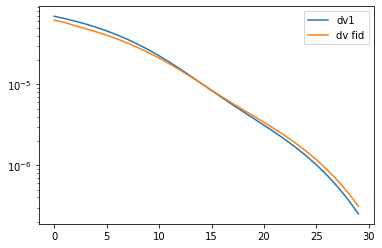

In [92]:
plt.plot(dv1[120:150], label='dv1')
plt.plot(dv2[120:150], label='dv fid')
plt.yscale('log')
plt.legend()

In [98]:
np.random.choice(100, 10, replace=False)

array([19, 53, 90, 43, 65, 36, 60, 51, 91, 50])

The observed shape of a galaxy $\epsilon^\mathrm{obs}$ can be expanded as 
$$\epsilon^\mathrm{obs} = R\gamma + \epsilon^\mathrm{int} + \delta \epsilon^\mathrm{sys}_\mathrm{PSF} + \delta\epsilon^\mathrm{noise} \tag{1}$$ 
where $R$ is the shear response, $\epsilon^\mathrm{int}$ is the intrinsic shape, $\delta\epsilon^\mathrm{noise}$ is the shape bias due to image noise, and 
$$\delta \epsilon^\mathrm{sys}_\mathrm{PSF} = \alpha\epsilon_\mathrm{model}+\beta(\epsilon_*-\epsilon_\mathrm{model})+\eta(\epsilon_*\frac{T_*-T_\mathrm{model}}{T_*})\tag{2}$$
is the shape bias due to PSF misestimation. Here $\epsilon_\mathrm{model}$ and $T_\mathrm{model}$ are the shape and size of the PSF modeled by `PIFF`, and $\epsilon_*$ and $T_*$ are observed shape and size of the PSF.

The two-point correlation functions of $p\equiv\epsilon_*$, $q\equiv(\epsilon_*-\epsilon_\mathrm{model})$, and $w\equiv(\epsilon_*\frac{T_*-T_\mathrm{model}}{T_*})$ can be measured from a reserved star shape catalog. The resulting 2PCFs are called "rho statistics":

$$\rho_0=\langle pp\rangle \tag{3}$$
$$\rho_1=\langle qq\rangle$$
$$\rho_2=\langle qp\rangle$$
$$\rho_3=\langle ww\rangle$$
$$\rho_4=\langle wq\rangle$$
$$\rho_5=\langle wp\rangle$$

2PCFs of cosmic shear $\gamma$ are estimated as
$$\hat{\xi}^{ij}_\pm = \frac{ \langle\epsilon^\mathrm{obs,i}_1(x)\epsilon^\mathrm{obs,j}_1(x+\theta) \rangle \pm \langle\epsilon^\mathrm{obs,i}_2(x)\epsilon^\mathrm{obs,j}_2(x+\theta) \rangle}{R^i R^j}. \tag{4}$$

Assuming no intrinsic alignment, if $\delta \epsilon^\mathrm{sys}_\mathrm{PSF}$ is not corrected, then it will produce a bias in $\hat{\xi}^{ij}_\pm$:
$$\delta \xi^{ij}_\pm = \frac{(\vec{u}^{i})^\mathrm{T}\cdot \rho \cdot \vec{u}^{j}}{R^i R^j},\tag{5}$$
where $\vec{u}^{i}\equiv(\alpha^i, \beta^i, \eta^i)^\mathrm{T}$ is the coefficients of tomography bin $i$, and $\rho$ is the rho statistics matrix
$$\rho = \begin{bmatrix} \rho_0 & \rho_2 & \rho_5 \\\ \rho_2 & \rho_1 & \rho_4 \\\ \rho_5 & \rho_4 & \rho_3 \end{bmatrix} \tag{6}$$

To measure the coefficients $\vec{u}^i$, one has to measured the 2PCF between galaxy shapes and star PSF catalog (so-called "tau statistics")

$$\tau_0^i(\theta) = \langle \epsilon^\mathrm{obs}(x) p(x+\theta)\rangle = \alpha^i \rho_0 + \beta^i \rho_2 + \eta^i \rho_5 \tag{7}$$
$$\tau_2^i(\theta) = \langle \epsilon^\mathrm{obs}(x) q(x+\theta)\rangle = \alpha^i \rho_2 + \beta^i \rho_1 + \eta^i \rho_4$$
$$\tau_3^i(\theta) = \langle \epsilon^\mathrm{obs}(x) w(x+\theta)\rangle = \alpha^i \rho_5 + \beta^i \rho_4 + \eta^i \rho_3$$
Therefore with rho and tau statistics, the coefficients $(\alpha, \beta, \eta)$ can be determined.

**P.S.** The different definition of $\delta \epsilon^\mathrm{sys}_\mathrm{PSF}$ is whether to absorb $R^i$ in the coefficients $\vec{u}^i$, or include them in Eq. (4). I think for Jefferson et al. (2025), they absorb the $R$ in the $\tau$ statistics